# JBI100 Visualization 
### Academic year 2024-2025
Data source selected: Railroad Incidents (https://data.transportation.gov/Railroads/Railroad-Equipment-Accident-Incident-Source-Data-F/aqxq-n5hy/about_data)

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import seaborn as sns

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python3 -m pip install lib' where lib is the according library name.

In [2]:
# Railroad Incidents
df_railroad = pd.read_csv('../Railroad Incidents/Railroad_Equipment_Accident_Incident_Source_Data__Form_54__20241026.csv', delimiter=',', low_memory=False)

In [3]:
print("=== Basic Dataset Information ===")
print(f"Number of records: {len(df_railroad)}")
print(f"Number of features: {len(df_railroad.columns)}")
display(df_railroad.info(show_counts=True))

=== Basic Dataset Information ===
Number of records: 220087
Number of features: 145
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220087 entries, 0 to 220086
Columns: 145 entries, IYR to SUBDIV
dtypes: float64(33), int64(49), object(63)
memory usage: 243.5+ MB


None

In [4]:
df_railroad.sample(5)

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
131734,79,5,MILW,138322,NaN,NaN,NaN,NaN,79.0,5.0,MILW,138322,F,NaN,79,5,8,10.0,0.0,PM,4.0,0,0,0,0,ILL-IOWA,CONCIL B,482.20,19,74,4.0,1.0,5.0,E,3841,4,0,7,Y,07,1,NaN,2,TTRX,940681,1.0,Y,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,750.0,0.0,H306,NaN,0,0,0,0,H306,2,1,5,3250.0,NaN,19C155,0,NaN,0,1.0,0.0,1.0,1.0,7.0,10.0,7.0,10.0,3,6,NaN,1L,0.0,??????,N,0,NaN,1979,0,0,0,0,0,0,POTTAWATTAMIE,155.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177207,76,10,RI,DM340631,NaN,NaN,NaN,NaN,76.0,10.0,RI,DM340631,NaN,NaN,76,10,19,3.0,0.0,PM,1.0,0,0,0,0,DES MOINES,IOWA FALLS,147,19,50,2.0,2.0,4.0,E,907,3,3168,7,Y,LOWER OLD MAIN,1,NaN,2,ROCK,133327,7.0,Y,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,21,0,17,0,0,8,0,0,0,0,525.0,2706.0,T110,NaN,0,0,0,0,T110,2,1,4,3231.0,NaN,19C083,0,NaN,0,1.0,0.0,1.0,2.0,6.0,0.0,6.0,0.0,1,6,NaN,1L,10.0,??????,NM,0,NaN,1976,0,0,0,0,0,0,HARDIN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97563,84,3,CR,0520002,NaN,NaN,NaN,NaN,84.0,3.0,CR,0520002,F,NaN,84,3,20,10.0,55.0,AM,4.0,0,0,0,0,ALLEGHENY,CONEMAUGH,NaN,42,38,2.0,1.0,0.0,NaN,NaN,NaN,0,6,Y,"#1 S TRACK,CONEMAUGH",1,NaN,2,PRR,667793,NaN,N,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,13,0,118,0,0,0,0,2,0,0,600.0,0.0,H207,NaN,0,0,0,0,H207,2,1,5,6600.0,NaN,42C021,0,0.0,0,0.0,0.0,1.0,0.0,NaN,NaN,3.0,10.0,1,2,E,1L,0.0,ALLEGH,N,208,NaN,1984,0,0,0,0,0,0,CAMBRIA,21.0,0.0,0.0,NaN,N,NaN,NaN,THREE UNITS OF TRAIN WICE 4 WERE BACKING WEST ...,IGNALS AND BACKED INTO CUT OF CARS WHICH WERE ...,DAMAGED.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127885,79,4,ICG,18901,NaN,NaN,NaN,NaN,79.0,4.0,ICG,18901,F,NaN,79,4,25,1.0,30.0,AM,1.0,1,1,0,0,CHICAGO,MARKHAM,21.1,17,52,4.0,3.0,5.0,E,11PM,1,0,7,Y,"TRACK #5 ""C"" YARD",1,NaN,2,ICG,526011,16.0,Y,ICG,526011.0,16.0,Y,1,0,0,0,0,0,0,0,0,0,27,0,9,0,1,6,0,2,0,0,73250.0,5000.0,E64C,NaN,0,0,0,0,E64C,2,1,5,78250.0,NaN,17C031,0,0.0,0,1.0,0.0,1.0,0.0,2.0,30.0,2.0,30.0,1,4,NaN,1L,1.0,??????,N,0,NaN,1979,0,0,0,0,0,0,COOK,31.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88834,86,3,CSRR,BOAMD0202,NaN,NaN,NaN,NaN,86.0,3.0,CSRR,BOAMD0202,NaN,NaN,86,3,3,12.0,20.0,AM,4.0,0,0,0,0,MARYLAND,WC OFFICE,176.9,24,30,4.0,2.0,8.0,R,8592,3,2100,1,Y,B LEAD,1,NaN,2,BO,008592,1.0,NaN,NaN,NaN,NaN,NaN,3,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,12000.0,0.0,H702,NaN,0,0,0,0,H702,1,3,8,38000.0,NaN,24C001,0,0.0,0,1.0,0.0,1.0,2.0,7.0,20.0,7.0,20.0,3,2,E,1L,0.0,MARYLA,N,190,NaN,1986,0,0,0,0,0,0,ALLEGANY,1.0,NaN,NaN,NaN,N,NaN,NaN,5 PM GRAFTON COAL TRAIN FAILED TO STOP ONE-HAL...,",DAMAGING UNIT 8592 OF ITS TRAIN,AND DERAILING...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_railroad.describe()

,IYR,IMO,IYR2,IMO2,IYR3,IMO3,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TONS,POSITON1,CARNBR2,POSITON2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CASKLDRR,CASINJRR,CASKLD,CASINJ,HIGHSPD,ACCDMG,DUMMY2,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY5,NARRLEN,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,CNTYCD,ALCOHOL,DRUG,Latitude,Longitud,SIGNAL,corrected_year
count,220087.000000,220087.000000,19104.000000,19104.000000,220075.000000,220075.000000,220087.000000,220087.000000,220087.000000,219971.000000,219971.000000,220085.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,219848.000000,219695.000000,220085.000000,220087.000000,206731.000000,26040.000000,102480.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,2.200870e+05,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,2.200870e+05,0.0,220087.000000,170341.000000,220087.000000,194445.000000,179994.000000,192510.000000,186233.000000,173114.000000,164501.000000,167504.000000,159903.000000,220087.000000,220087.000000,135068.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,220087.000000,216460.000000,77633.000000,77990.000000,65518.000000,65534.000000,32952.000000,220087.000000
mean,58.457151,6.430484,58.358093,6.443729,58.459112,6.430553,58.457151,6.430439,15.683852,6.378195,25.536175,3.360288,1.323181,0.175108,0.016566,2.104822,29.287255,56.074966,2.835068,1.561082,11.599173,3179.374520,21.652631,218525.805146,8.349336,1.994393,0.014076,0.016493,0.047304,0.027030,0.142707,0.001059,0.001472,0.003217,0.002263,29.715967,0.206773,16.494227,0.080059,0.282825,2.386156,0.017888,1.095017,0.009910,0.037435,4.232131e+04,1.696403e+04,0.015099,0.160482,0.019406,0.212189,13.383294,7.551073e+04,NaN,0.127968,0.827875,0.010291,0.938080,0.109037,0.880993,1.061101,4.678443,26.741065,4.615669,26.282346,1.310064,4.411660,7.630127,125.403263,1992.578658,0.002136,0.057768,0.000895,0.046023,0.010773,0.032478,94.738243,0.004972,0.006873,19.053823,-46.785261,1.703630,1992.578658
std,35.324501,3.454854,35.198010,3.462284,35.324465,3.454871,35.324501,3.454847,8.753281,3.454506,17.404966,3.865331,6.276111,1.032637,0.275013,144.729320,15.305599,23.042244,1.031857,0.989425,15.173735,4368.975321,28.415808,278239.919130,21.494474,1.542257,0.219672,0.221338,0.317775,0.210501,0.543985,0.050835,0.055320,0.082162,0.062324,33.429377,1.672923,26.201682,0.904526,1.676468,4.344012,0.354169,2.850385,0.173137,2.413682,2.117443e+05,9.589022e+04,0.208011,3.467542,0.261345,3.877860,15.807863,3.380469e+05,NaN,3.439321,14.503918,0.184080,0.361202,0.316234,0.373626,0.896155,2.888406,17.038720,2.937505,17.268620,0.676853,1.952614,22.994886,160.042357,14.649407,0.062109,0.430104,0.120219,2.311245,0.134838,2.571456,94.817205,0.079938,0.090611,19.224871,47.349838,0.456663,14.649407
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1975.000000,0.000000,0.0

In [5]:
# Get a random sample
sample_df = df_railroad.sample(n=5, random_state=42)

# Split columns into chunks of 10 for easier viewing
chunk_size = 10
for i in range(0, len(sample_df.columns), chunk_size):
    chunk_cols = sample_df.columns[i:i+chunk_size]
    print(f"\n=== Columns {i+1} to {min(i+chunk_size, len(sample_df.columns))} ===")
    print(sample_df[chunk_cols].to_string())
    print("\nColumn Types:")
    for col in chunk_cols:
        print(f"{col}: {sample_df[col].dtype}")
    print("\n" + "="*80 + "\n")


=== Columns 1 to 10 ===
       IYR  IMO RAILROAD    INCDTNO  IYR2  IMO2  RR2 INCDTNO2  IYR3  IMO3
98472   84    2       MP      84050   NaN   NaN  NaN      NaN  84.0   2.0
19112   13    8      MNR      12602   NaN   NaN  NaN      NaN  13.0   8.0
76776   89    8      CSX  088908022   NaN   NaN  NaN      NaN  89.0   8.0
69789   91    7       CC        691   NaN   NaN  NaN      NaN  91.0   7.0
79572   88   11     MNCW        004   NaN   NaN  NaN      NaN  88.0  11.0

Column Types:
IYR: int64
IMO: int64
RAILROAD: object
INCDTNO: object
IYR2: float64
IMO2: float64
RR2: object
INCDTNO2: object
IYR3: float64
IMO3: float64



=== Columns 11 to 20 ===
        RR3   INCDTNO3 DUMMY1     GXID  YEAR  MONTH  DAY  TIMEHR  TIMEMIN AMPM
98472    MP      84050    NaN  434138B    84      2   24     8.0     20.0   AM
19112   MMA    1308011    NaN      NaN    13      8    1     3.0     15.0   PM
76776   CSX  088908022    NaN      NaN    89      8   17     1.0      0.0   AM
69789    CC        691    NaN   

In [6]:
# Years are missing the centuries, so add them
df_railroad['corrected_year'] = np.where(df_railroad['YEAR'] > 24.0, 1900+df_railroad['YEAR'], 2000+df_railroad['YEAR'])

fig = px.histogram(df_railroad, x="corrected_year",
                 width=1000, height=800)
fig.show()

### Write a small parsing function that can read the data position (column, row) from the file format you selected.

In [7]:
def parse_incident(df, row_index):
    try:
        # Extract the specified row
        row = df.iloc[row_index]

        # Parse datetime components
        datetime = {
            'year': row['YEAR'],
            'month': row['MONTH'],
            'day': row['DAY'],
            'hour': row['TIMEHR'],
            'minute': row['TIMEMIN'],
            'ampm': row['AMPM']
        }

        # Parse location
        location = {
            'latitude': row['Latitude'],
            'longitude': row['Longitud']
        }

        # Parse incident details
        incident = {
            'type': row['TYPE'],
            'damage': row['ACCDMG'],
            'injuries': row['CASINJ'],
            'fatalities': row['CASKLD']
        }

        return {
            'datetime': datetime,
            'location': location,
            'incident': incident
        }

    except KeyError as e:
        print(f"Column not found: {e}")
        return None
    except IndexError:
        print(f"Row index {row_index} is out of bounds")
        return None
    except Exception as e:
        print(f"Error parsing data: {e}")
        return None

In [8]:
incident_data = parse_incident(df_railroad, 0)  # first row
if incident_data:
    print(f"Incident type: {incident_data['incident']['type']}")
    print(f"Location: {incident_data['location']}")

Incident type: 9.0
Location: {'latitude': np.float64(62.0506), 'longitude': np.float64(-150.0763)}


### Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values.


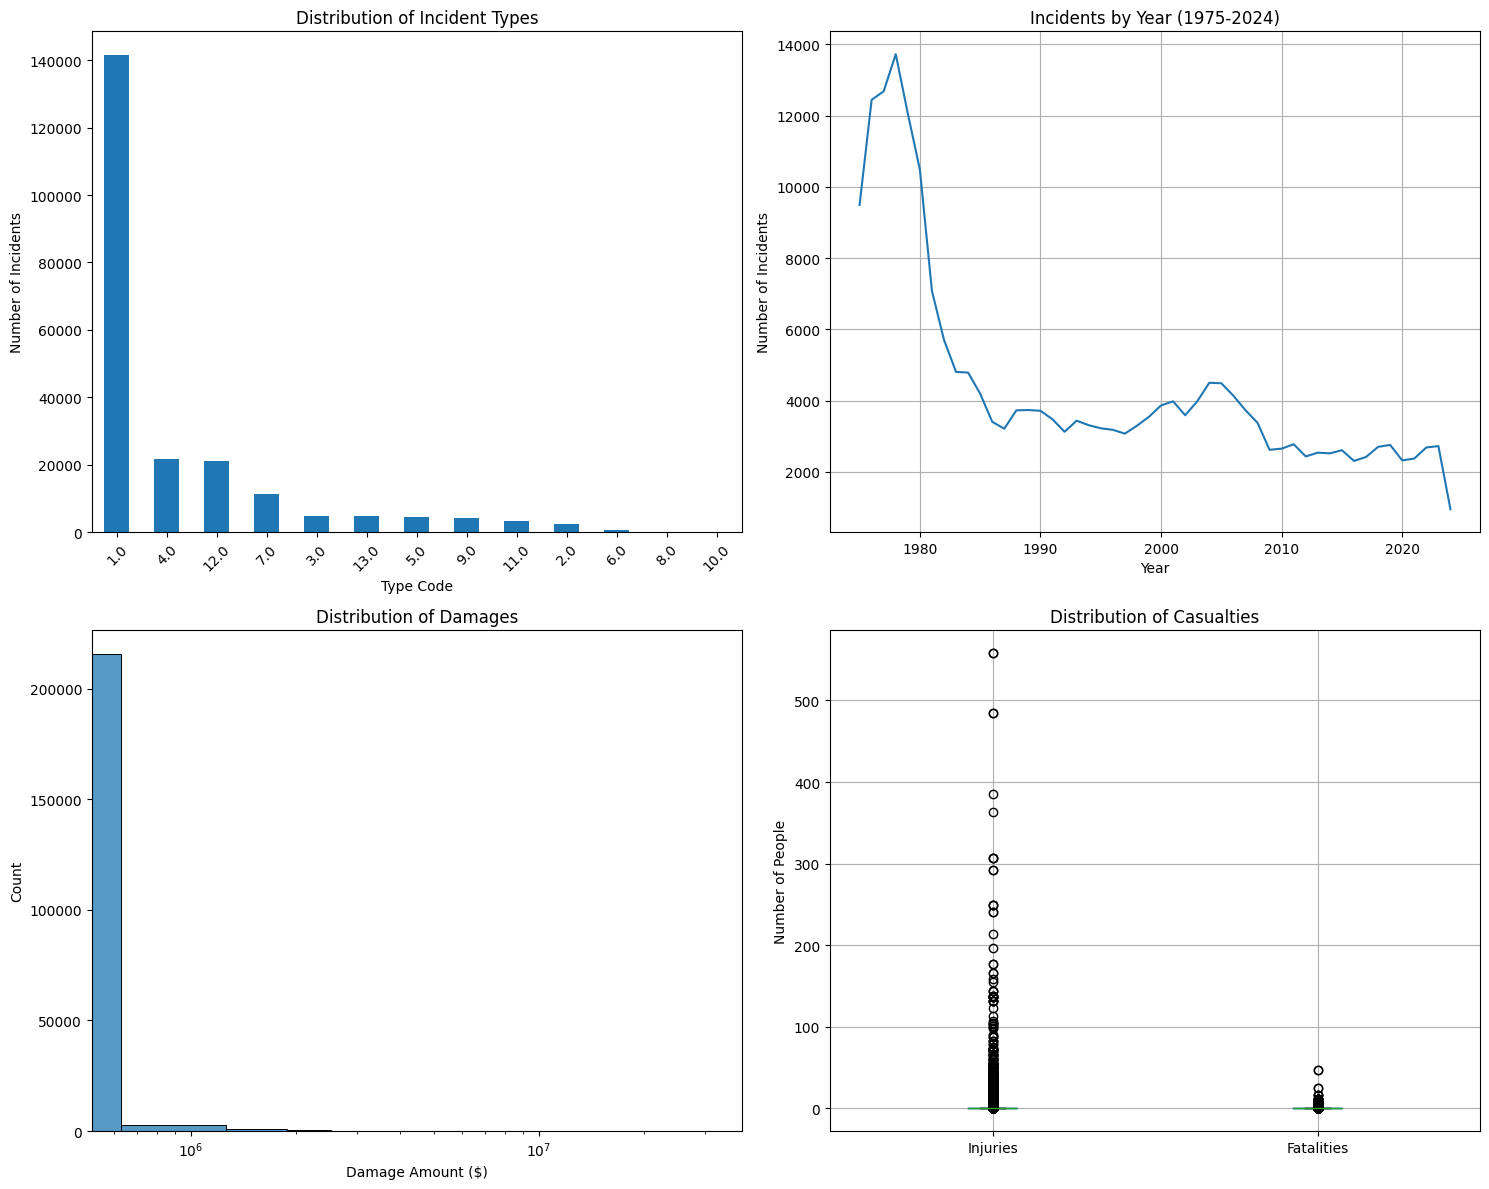

In [ ]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Incident Types
type_counts = df_railroad['TYPE'].value_counts()
type_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Incident Types')
axes[0, 0].set_xlabel('Type Code')
axes[0, 0].set_ylabel('Number of Incidents')
axes[0, 0].tick_params(axis='x', rotation=45)

# Timeline of incidents by corrected year
df_railroad['corrected_year'].value_counts().sort_index().plot(
    kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Incidents by Year (1975-2024)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Incidents')
axes[0, 1].grid(True)

# Damage distribution (log scale due to likely skew)
sns.histplot(data=df_railroad, x='ACCDMG', ax=axes[1, 0], bins=50)
axes[1, 0].set_title('Distribution of Damages')
axes[1, 0].set_xlabel('Damage Amount ($)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xscale('log')

# Casualties
df_railroad[['CASINJ', 'CASKLD']].boxplot(ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Casualties')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].set_xticklabels(['Injuries', 'Fatalities'])

plt.tight_layout()
plt.show()